In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression

# Configure output display
pd.set_option('display.max_columns', 200)

In [2]:
# Database connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'houseprices'

In [3]:
# Establish and dispose of connection
connection = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

house_prices = pd.read_sql_query('select * from houseprices', con=connection)
    
connection.dispose()

### Data Cleaning, Exploration and Engineering

#### Missing Values 

In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
house_prices.describe(include='all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.0

In [6]:
# Retrieve unique values for categorical variables
for column in house_prices.columns:
    if house_prices[column].dtype == 'object':
        print(column, '-------------------')
        print(house_prices[column].unique())

mszoning -------------------
['RL' 'RM' 'C (all)' 'FV' 'RH']
street -------------------
['Pave' 'Grvl']
alley -------------------
[None 'Grvl' 'Pave']
lotshape -------------------
['Reg' 'IR1' 'IR2' 'IR3']
landcontour -------------------
['Lvl' 'Bnk' 'Low' 'HLS']
utilities -------------------
['AllPub' 'NoSeWa']
lotconfig -------------------
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
landslope -------------------
['Gtl' 'Mod' 'Sev']
neighborhood -------------------
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
condition1 -------------------
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
condition2 -------------------
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
bldgtype -------------------
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
housestyle ----------

In [7]:
# Drop variables with significantly large amount of missing values
house_prices.drop(['alley', 'poolqc', 'fence', 'miscfeature'], axis=1, inplace=True)

In [8]:
# Replace categorical variables with missing values with 'Other' category
for column in house_prices.columns:
    if house_prices[column].isnull().sum() > 0 and house_prices[column].dtype == 'object':
        house_prices[column].fillna('Other', inplace=True)

In [9]:
# Retrieve numeric variables with missing values
columns_missing_values = list()

for column in house_prices.columns:
    if house_prices[column].isnull().sum() > 0 and house_prices[column].dtype in ('int64', 'float64'):
        columns_missing_values.append(column)
        
print(columns_missing_values)

['lotfrontage', 'masvnrarea', 'garageyrblt']


In [10]:
# Review descriptive statistics of numeric variables with missing values
house_prices.loc[:, columns_missing_values].describe()   

,lotfrontage,masvnrarea,garageyrblt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [11]:
# Replace numeric variables missing values with median and mean
house_prices['lotfrontage'].fillna(house_prices['lotfrontage'].median(), inplace=True)
house_prices['masvnrarea'].fillna(house_prices['masvnrarea'].median(), inplace=True)
house_prices['garageyrblt'].fillna(house_prices['garageyrblt'].mean(), inplace=True)

In [12]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1460 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non

#### Outlier Detection and Treatment 

In [13]:
# Function to generate Boxplot and Histogram
def outlier_visual(df, variable):
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(df[variable])
    plt.title('{} Boxplot'.format(variable))
    
    plt.subplot(1, 2, 2)
    plt.hist(df[variable])
    plt.title('{} Histogram'.format(variable))
    
    plt.show()

In [14]:
# Separate numeric variables into list
numeric_variables = []

for column in house_prices.columns:
    if column not in ('id', 'saleprice') and house_prices[column].dtype in ('int64', 'float64'):
        numeric_variables.append(column)
                            
print(numeric_variables)

['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


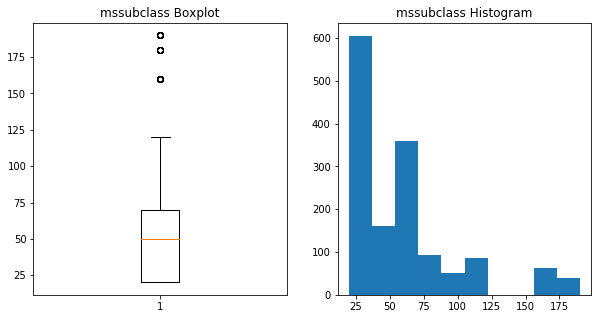

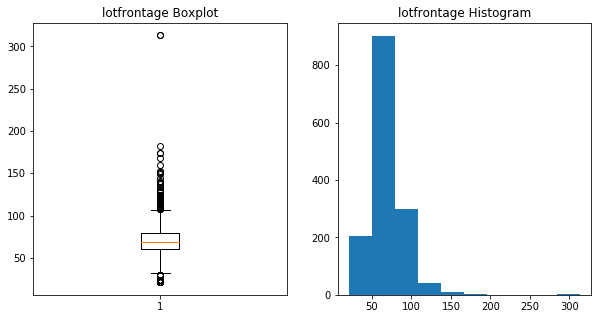

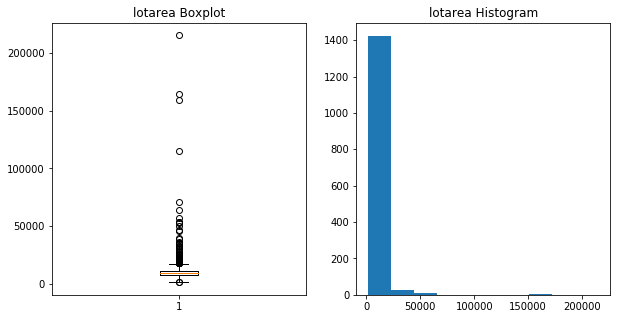

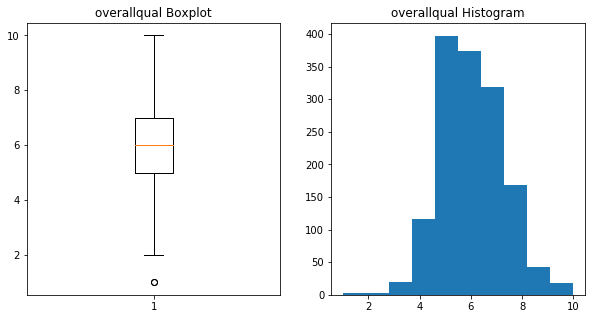

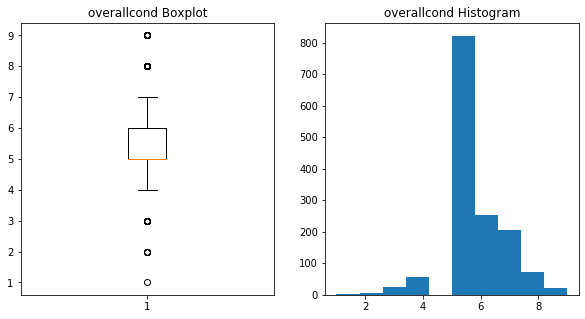

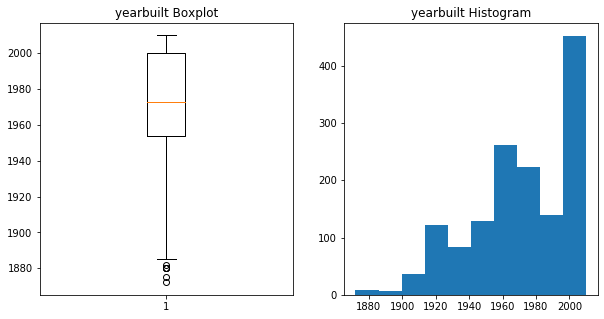

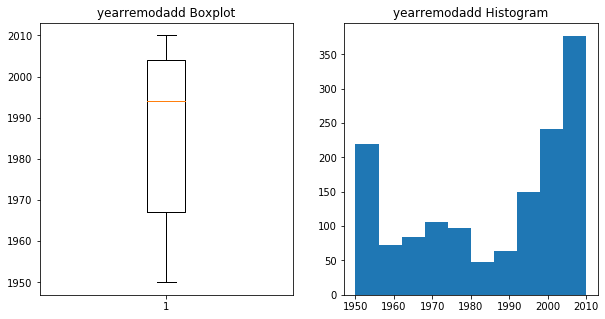

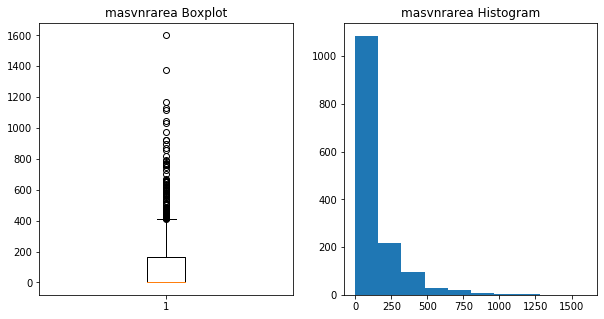

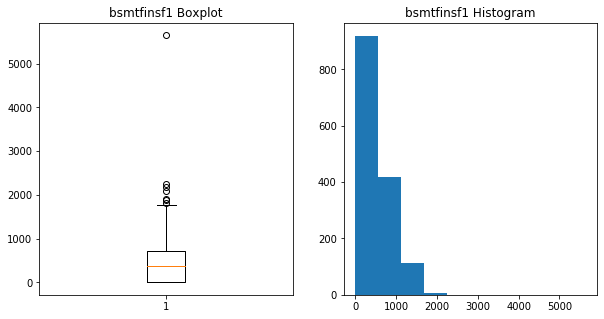

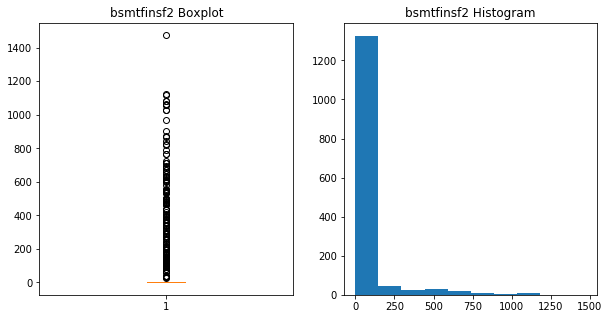

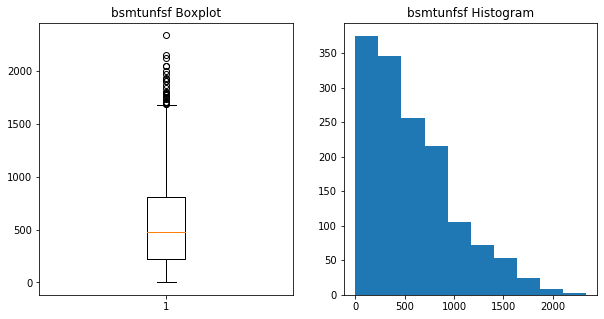

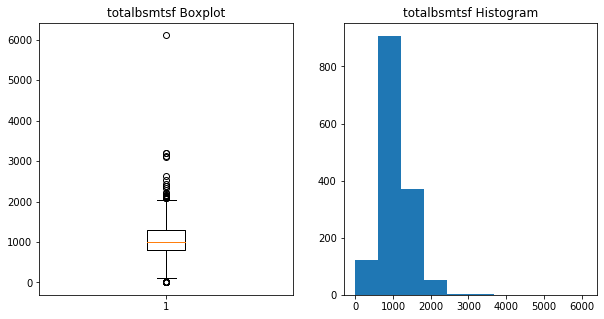

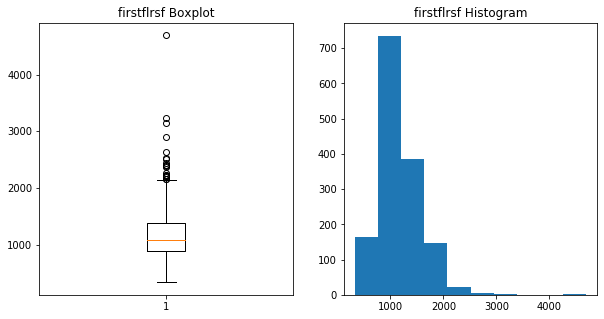

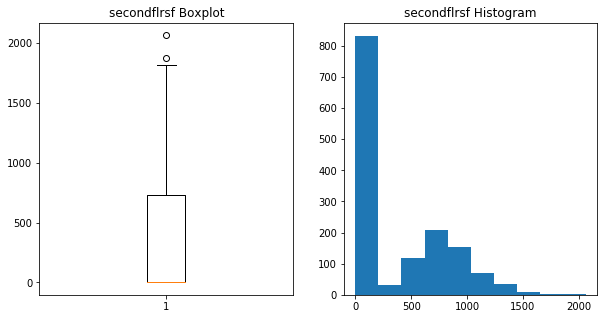

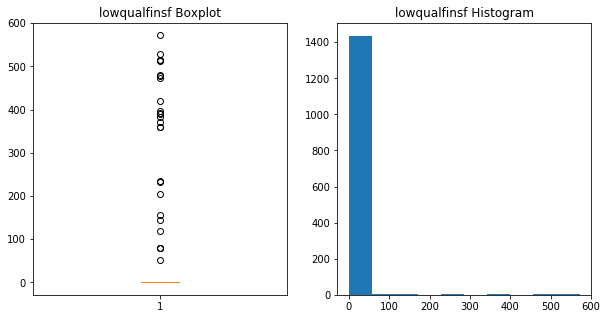

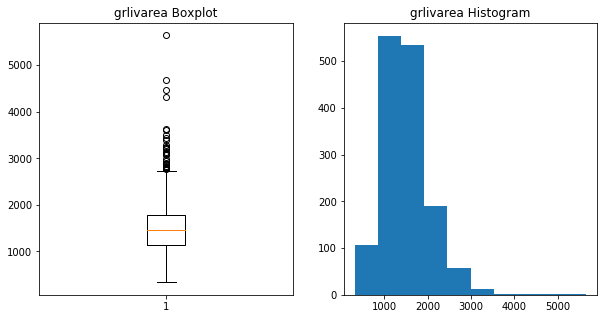

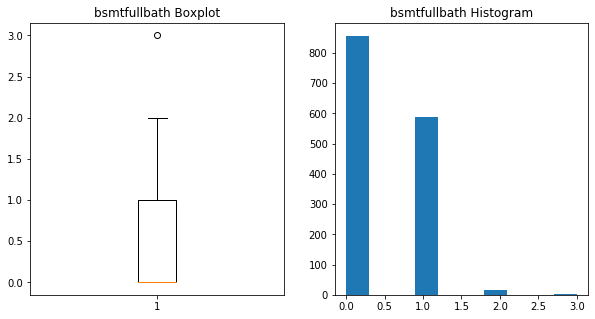

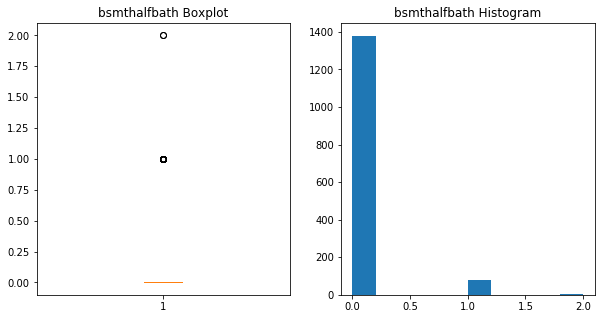

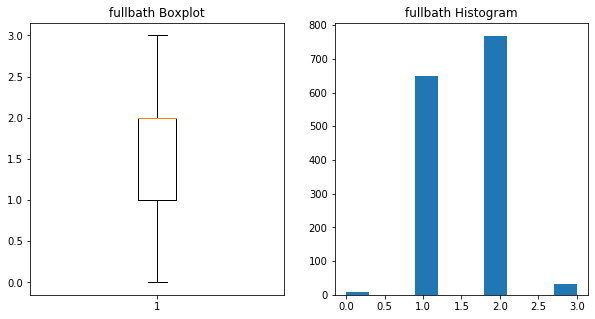

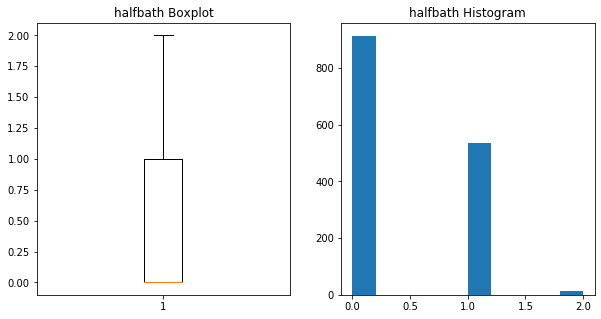

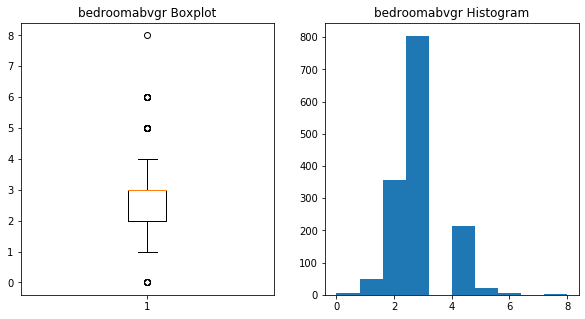

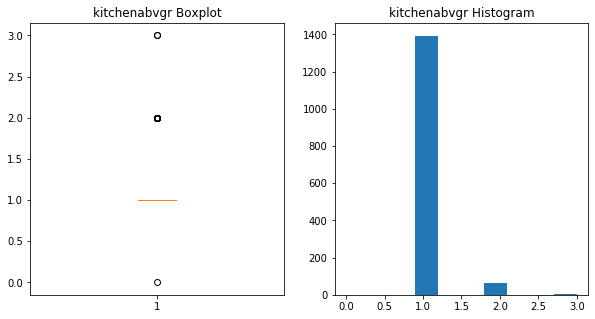

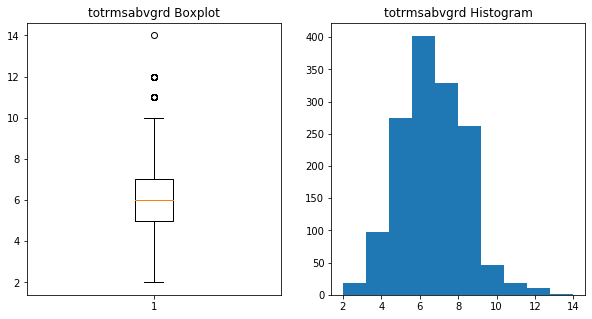

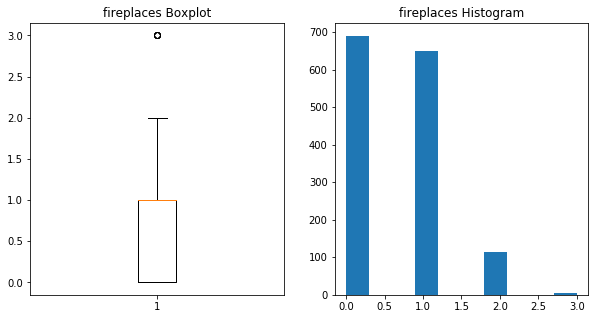

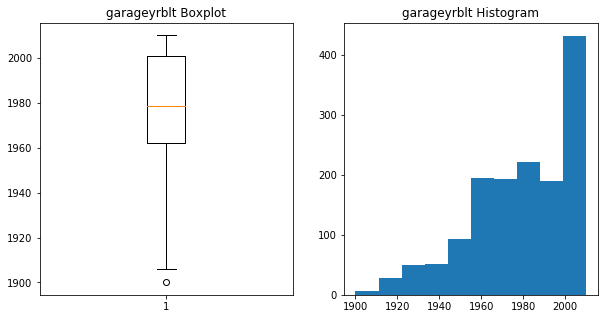

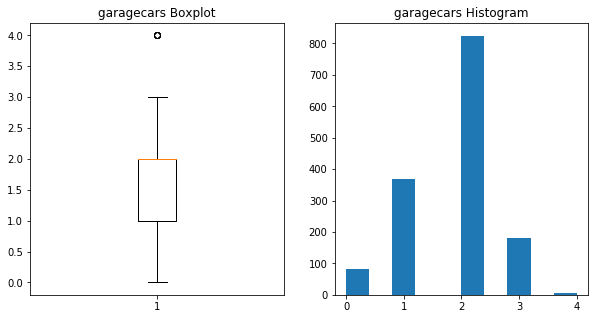

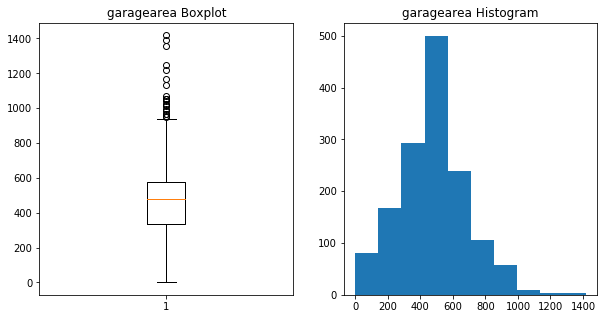

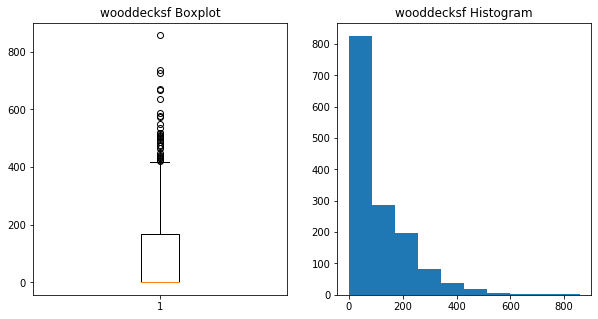

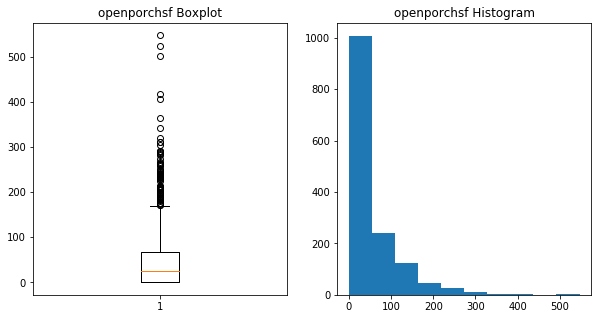

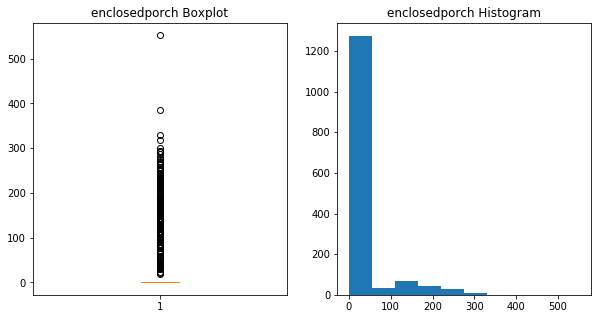

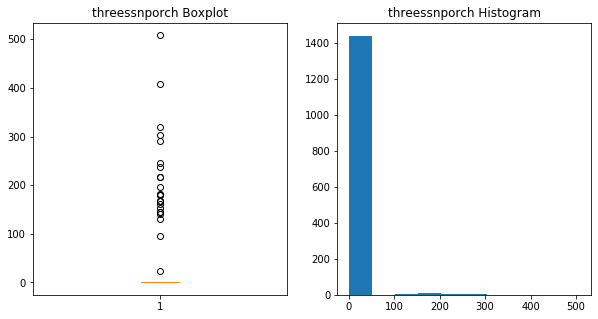

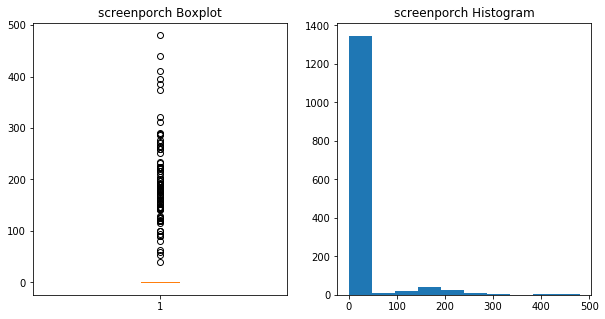

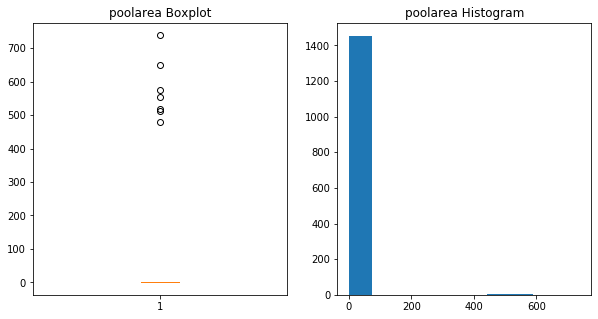

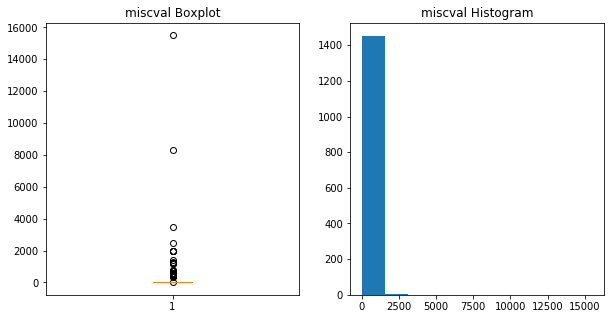

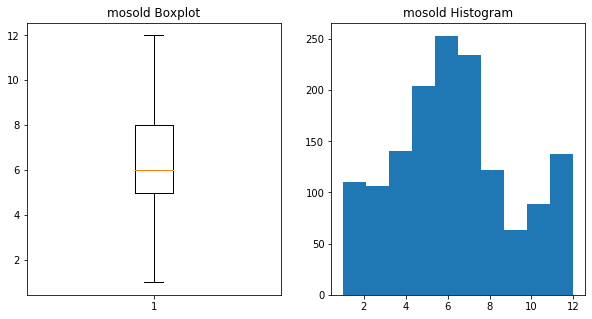

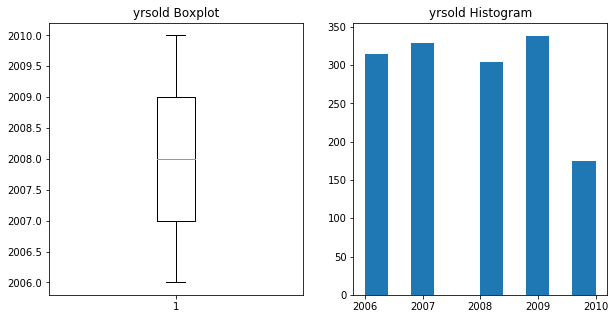

In [15]:
# Generate visualization for each numeric variable
for variable in numeric_variables:
    outlier_visual(house_prices, variable)

In [16]:
def winsorize_visual(df, name):
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(df)
    plt.title('{} Boxplot Winz'.format(name))
    
    plt.subplot(1, 2, 2)
    plt.hist(df)
    plt.title('{} Histogram Winz'.format(name))
    
    plt.show()

In [17]:
# Apply winsorization / transformation to variables with outliers
win_openporchsf = winsorize(house_prices['openporchsf'], (0, 0.10))
win_wooddecksf = winsorize(house_prices['wooddecksf'], (0, 0.10))
win_garagearea = winsorize(house_prices['garagearea'], (0, 0.10))
win_totrmsabvgrd = winsorize(house_prices['totrmsabvgrd'], (0, 0.10))
win_bedroomabvgr = winsorize(house_prices['bedroomabvgr'], (0.05, 0.10))
win_grlivarea = winsorize(house_prices['grlivarea'], (0, 0.10))
win_firstflrsf = winsorize(house_prices['firstflrsf'], (0, 0.10))
win_totalbsmtsf = winsorize(house_prices['totalbsmtsf'], (0.05, 0.10))
win_bsmtunfsf = winsorize(house_prices['bsmtunfsf'], (0, 0.10))
win_bsmtfinsf1 = winsorize(house_prices['bsmtfinsf1'], (0, 0.10))
win_masvnrarea = winsorize(house_prices['masvnrarea'], (0, 0.10))
win_yearbuilt = winsorize(house_prices['yearbuilt'], (0.10, 0))
win_overallcond = winsorize(house_prices['overallcond'], (0.05, 0.05))
win_lotarea = winsorize(house_prices['lotarea'], (0.05, 0.10))
win_lotfrontage = winsorize(house_prices['lotfrontage'], (0.05, 0.10))
win_mssubclass = winsorize(house_prices['mssubclass'], (0, 0.10))

win_variables = [win_openporchsf, win_wooddecksf, win_garagearea, win_totrmsabvgrd, win_bedroomabvgr, win_grlivarea,
                 win_firstflrsf, win_totalbsmtsf, win_bsmtunfsf, win_bsmtfinsf1, win_masvnrarea, win_yearbuilt, 
                 win_overallcond, win_lotarea, win_lotfrontage, win_mssubclass]

win_names = ['openporchsf', 'wooddecksf', 'garagearea', 'totrmsabvgrd', 'bedroomabvgr', 'grlivarea', 'firstflrsf',
             'totalbsmtsf', 'bsmtunfsf', 'bsmtfinsf1', 'masvnrarea', 'yearbuilt', 'overallcond',
             'lotarea', 'lotfrontage', 'mssubclass']

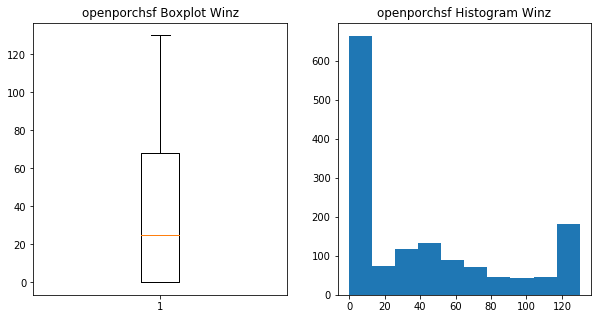

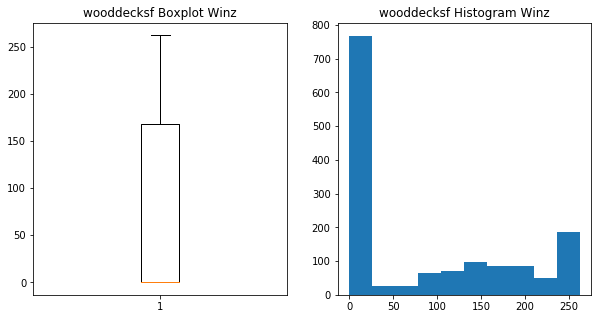

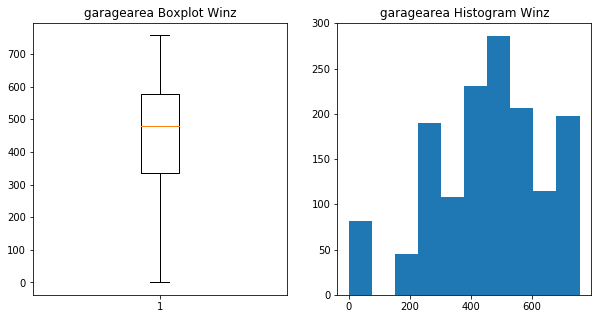

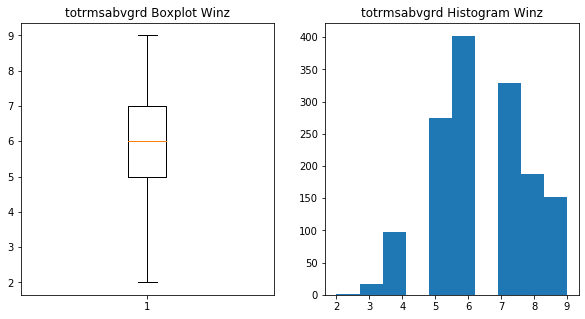

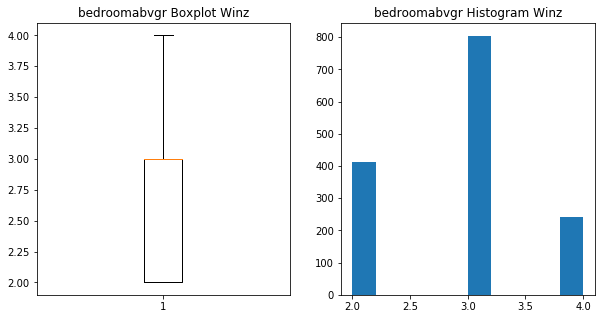

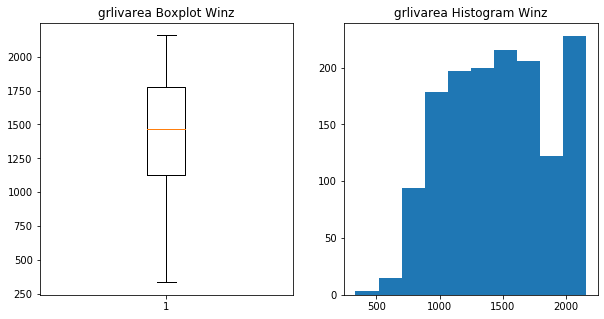

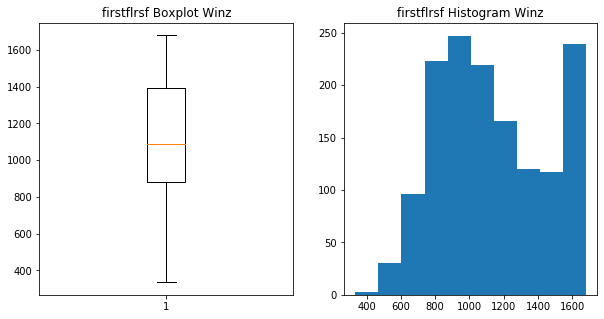

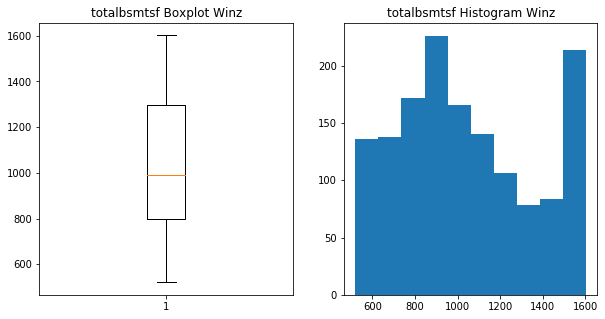

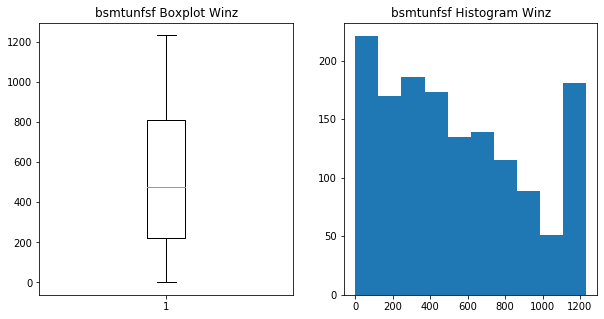

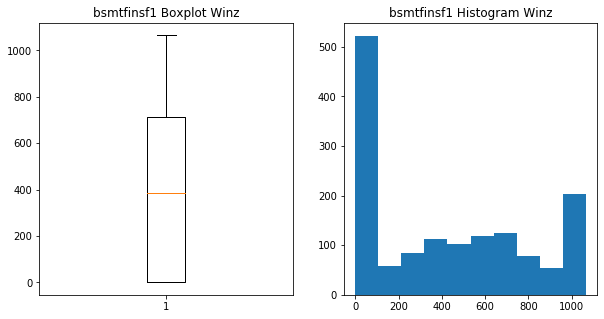

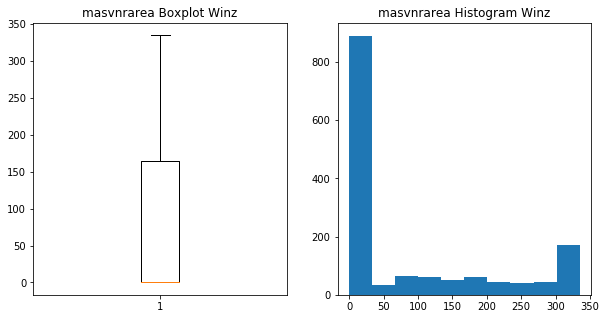

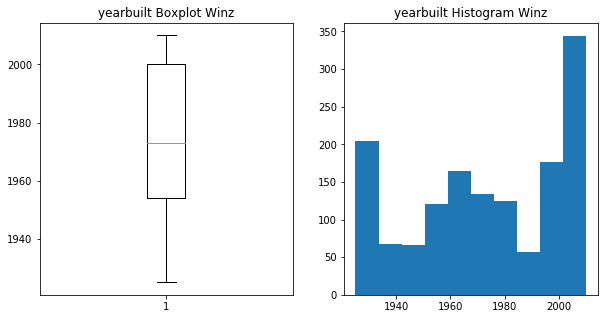

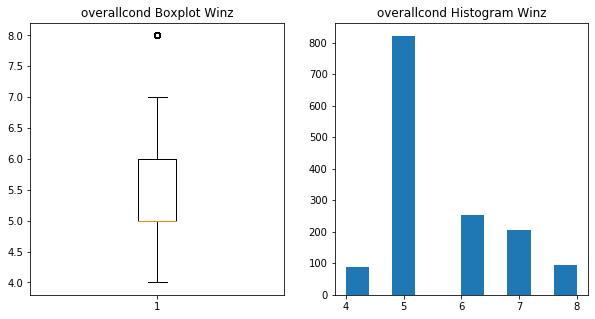

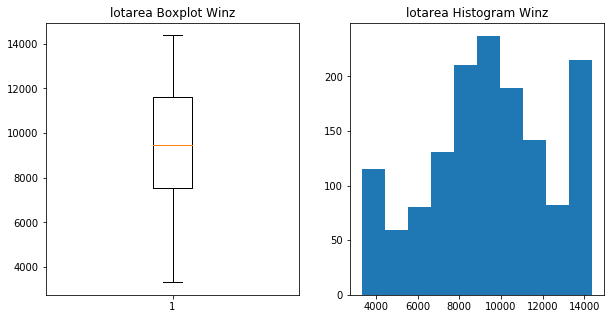

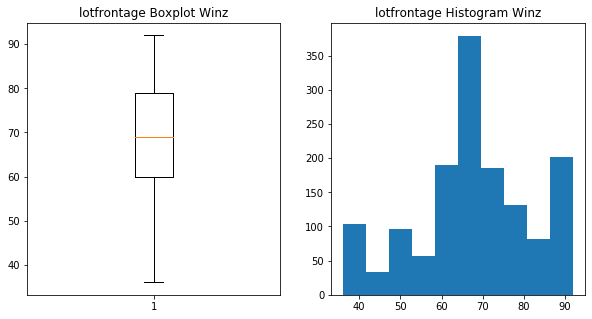

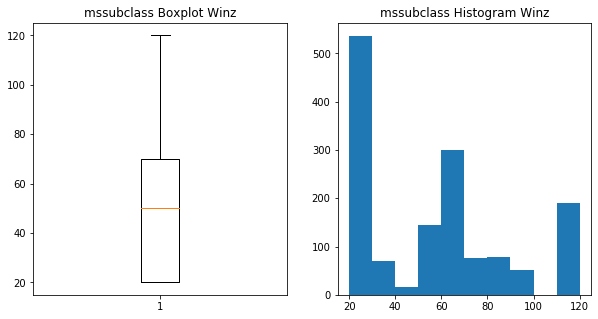

In [18]:
# Generate visual for winsorized variables
for variable, name in zip(win_variables, win_names):
    winsorize_visual(variable, name)

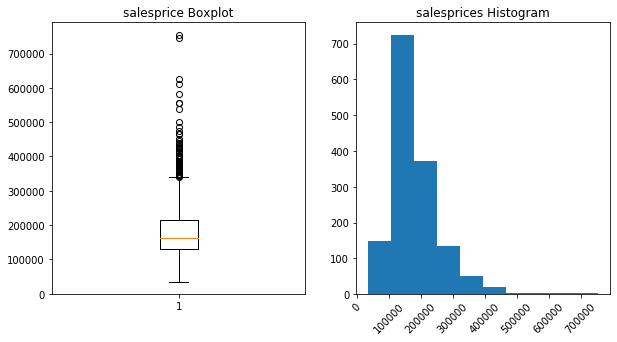

In [19]:
# Target variable exploration
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(house_prices['saleprice'])
plt.title('salesprice Boxplot')

plt.subplot(1, 2, 2)
plt.hist(house_prices['saleprice'])
plt.title('salesprices Histogram')
plt.xticks(rotation=45)

plt.show()

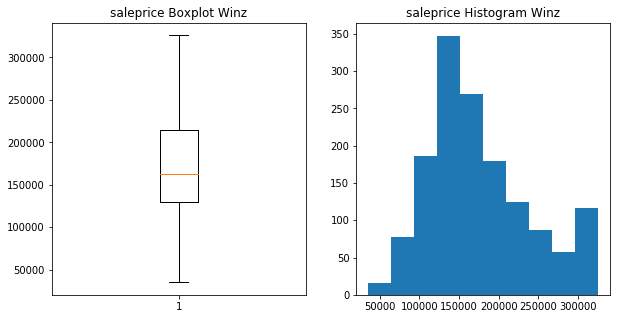

In [20]:
# Apple winsorization to target variable
win_sp = winsorize(house_prices['saleprice'], (0, 0.05))

winsorize_visual(win_sp, 'saleprice')

In [21]:
# Make adjustments to df
house_prices.drop(win_names, axis=1, inplace=True)
house_prices.drop('saleprice', axis=1, inplace=True)

for variable, name in zip(win_variables, win_names):
    house_prices[name] = variable
    
house_prices['saleprice'] = win_sp

In [22]:
win_variables = []

for variable in house_prices.columns:
    if house_prices[variable].dtype in ('int64', 'float64'):
        win_variables.append(str(variable))
        
print(win_variables)

['id', 'overallqual', 'yearremodadd', 'bsmtfinsf2', 'secondflrsf', 'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'kitchenabvgr', 'fireplaces', 'garageyrblt', 'garagecars', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'openporchsf', 'wooddecksf', 'garagearea', 'totrmsabvgrd', 'bedroomabvgr', 'grlivarea', 'firstflrsf', 'totalbsmtsf', 'bsmtunfsf', 'bsmtfinsf1', 'masvnrarea', 'yearbuilt', 'overallcond', 'lotarea', 'lotfrontage', 'mssubclass', 'saleprice']


In [23]:
house_prices[win_variables].corr()

,id,overallqual,yearremodadd,bsmtfinsf2,secondflrsf,lowqualfinsf,bsmtfullbath,bsmthalfbath,fullbath,halfbath,kitchenabvgr,fireplaces,garageyrblt,garagecars,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,openporchsf,wooddecksf,garagearea,totrmsabvgrd,bedroomabvgr,grlivarea,firstflrsf,totalbsmtsf,bsmtunfsf,bsmtfinsf1,masvnrarea,yearbuilt,overallcond,lotarea,lotfrontage,mssubclass,saleprice
id,1.000000,-0.028365,-0.021998,-0.005968,0.005590,-0.044230,0.002289,-0.020155,0.005587,0.006784,0.002951,-0.019772,0.000070,0.016570,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.013725,-0.042995,0.009212,0.018288,0.042485,0.000770,0.001986,-0.030228,-0.009295,-0.008618,-0.042843,-0.008880,0.006217,-0.011197,-0.028188,0.017370,-0.027107
overallqual,-0.028365,1.000000,0.550684,-0.059119,0.295493,-0.030429,0.111098,-0.040150,0.550600,0.273458,-0.183882,0.396765,0.518018,0.600671,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.380462,0.271391,0.564535,0.437464,0.129947,0.599505,0.452416,0.509516,0.278534,0.177604,0.410395,0.605258,-0.141556,0.235654,0.236529,0.087750,0.817302
yearremodadd,-0.021998,0.550684,1.000000,-0.067759,0.140024,-0.062419,0.119470,-0.012337,0.439046,0.183331,-0.149598,0.112581,0.618130,0.420622,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.301586,0.253784,0.379863,0.203808,-0.024849,0.309015,0.246427,0.298024,0.157760,0.101103,0.185165,0.632401,0.041228,0.065033,0.071779,0.069449,0.556189
bsmtfinsf2,-0.005968,-0.059119,-0.067759,1.000000,-0.099260,0.014807,0.158678,0.070948,-0.076444,-0.032148,-0.040751,0.046921,-0.087126,-0.038264,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.023529,0.054700,-0.007810,-0.039105,-0.014904,-0.012338,0.101231,0.109593,-0.224914,-0.046878,-0.074939,-0.062190,0.043497,0.084146,0.049377,-0.073240,-0.006533
secondflrsf,0.005590,0.295493,0.140024,-0.099260,1.000000,0.063353,-0.169494,-0.023855,0.421378,0.609707,0.059306,0.194561,0.069315,0.183926,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,-0.028700,0.218740,0.086879,0.137802,0.600357,0.530408,0.659138,-0.236788,-0.242252,0.045377,-0.161007,0.133914,0.048636,0.008411,0.127799,0.069221,0.343260,0.318260
lowqualfinsf,-0.044230,-0.030429,-0.062419,0.014807,0.063353,1.000000,-0.047143,-0.005842,-0.000710,-0.027080,0.007522,-0.021272,-0.029167,-0.094480,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,0.002847,-0.028580,-0.073192,0.075347,0.056980,0.083493,-0.007718,-0.038850,0.041467,-0.068008,-0.083092,-0.173683,0.038458,0.003873,0.008270,0.045253,-0.041494
bsmtfullbath,0.002289,0.111098,0.119470,0.158678,-0.169494,-0.047143,1.000000,-0.147871,-0.064512,-0.030905,-0.041503,0.137928,0.119912,0.131881,-0.049911,-0.000106,0.023148,0.067616,-0.023047,-0.025361,0.067049,0.073560,0.172314,0.177672,-0.061792,-0.107735,0.013868,0.236049,0.297645,-0.443089,0.666686,0.098102,0.182581,-0.053457,0.108001,0.059515,0.000868,0.238510
bsmthalfbath,-0.020155,-0.040150,-0.012337,0.070948,-0.023855,-0.005842,-0.147871,1.000000,-0.054536,-0.012340,-0.037944,0.028976,-0.075135,-0.020891,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.035691,0.047878,-0.018439,-0.027092,0.043037,-0.027770,0.012279,-0.001096,-0.095438,0.078617,0.032222,-0.048858,0.115217,0.038041,-0.007609,0.009901,-0.026427
fullbath,0.005587,0.550600,0.439046,-0.076444,0.421378,-0.000710,-0.064512,-0.054536,1.000000,0.136381,0.133115,0.243671,0.468466,0.469672,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.313419,0.219214,0.421307,0.553620,0.341497,0.644140,0.374834,0.345628,0.267510,0.020867,0.271367,0.503907,-0.231214,0.218403,0.187256,0.166303,0.587478
halfbath,0.006784,0.273458,0.183331,-0.032148,0.609707,-0.027080,-0.030905,-0.012340,0.136381,1.000000,-0.068263,0.203649,0.191061,0.219178,-0.095317,-0.004972,0.072426,0.022381,0.001290,-0.009050,-0.010269,0.235618,0.106589,0.166122,0.359112,0.286699,0.436210,-0.154398,-0.

In [24]:
# Apply one-hot encoding for centralair
house_prices['ac'] = pd.get_dummies(house_prices['centralair'], drop_first=True)

In [31]:
# Create X and y dataframes
X = house_prices[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'totalbsmtsf', 'garagecars', 'ac']]
y = house_prices['saleprice']

In [27]:
# Create and train model
lrm = LinearRegression()
lrm.fit(X, y)
predictions = lrm.predict(X)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.92655928e+04  4.89396804e+01  2.69916850e+01 -2.98920885e+00
  4.52422414e+01  8.42469633e+03  1.52435185e+04]

Intercept: 
 -98295.29296924823


### Assumptions of Linear Regression 

Assumption One: linearity of the model in its coefficients

In [38]:
def prediction_visual(df, name):
    
    plt.scatter(df, predictions)
    plt.xlabel(name)
    plt.ylabel('Target')
    plt.show()

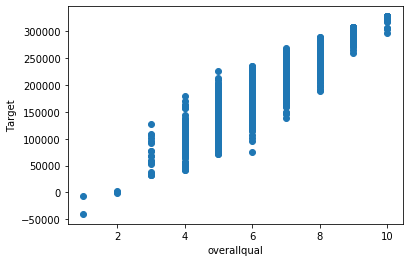

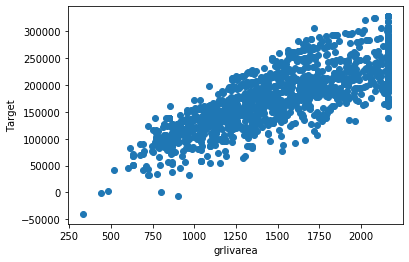

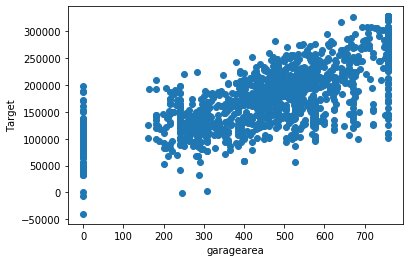

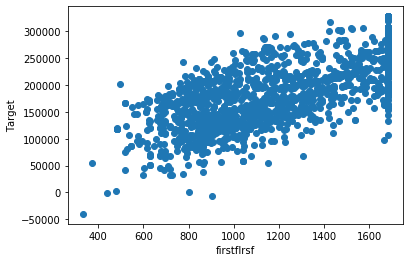

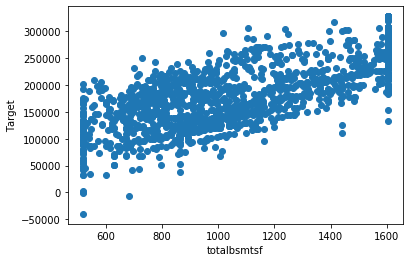

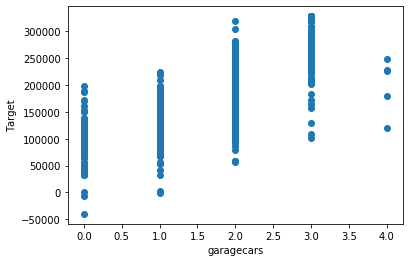

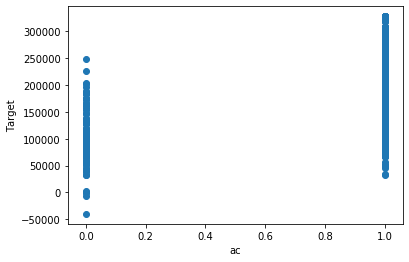

In [39]:
for column in X.columns:
    prediction_visual(X[column], column)

Assumption Two: the error term should be zero on average

In [33]:
errors = y - predictions
print('Mean of the errors in the model is {}'.format(np.mean(errors)))

Mean of the errors in the model is 3.92901711165905e-11


Assumption Three: homoscedascticity

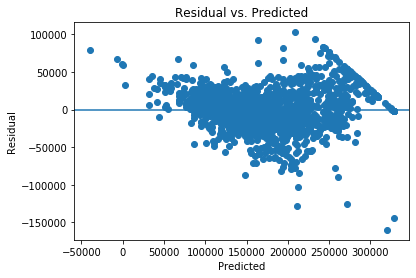

In [34]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [35]:
from scipy.stats import bartlett, levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 781.674 and p value is 5.21e-172
Levene test statistic value is 706.65 and p value is 1.3e-139


Assumption Four: low multicollinearity

In [37]:
house_prices[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'totalbsmtsf', 'garagecars', 'ac', 'saleprice']].corr()

,overallqual,grlivarea,garagearea,firstflrsf,totalbsmtsf,garagecars,ac,saleprice
overallqual,1.000000,0.599505,0.564535,0.452416,0.509516,0.600671,0.272038,0.817302
grlivarea,0.599505,1.000000,0.464783,0.501305,0.387465,0.491415,0.105935,0.723247
garagearea,0.564535,0.464783,1.000000,0.480421,0.483497,0.897551,0.248392,0.653542
firstflrsf,0.452416,0.501305,0.480421,1.000000,0.844105,0.453312,0.162125,0.604745
totalbsmtsf,0.509516,0.387465,0.483497,0.844105,1.000000,0.462949,0.209068,0.633738
garagecars,0.600671,0.491415,0.897551,0.453312,0.462949,1.000000,0.233726,0.673251
ac,0.272038,0.105935,0.248392,0.162125,0.209068,0.233726,1.000000,0.287045
saleprice,0.817302,0.723247,0.653542,0.604745,0.633738,0.673251,0.287045,1.000000


Assumption Five: error terms should be uncorrelated with one another

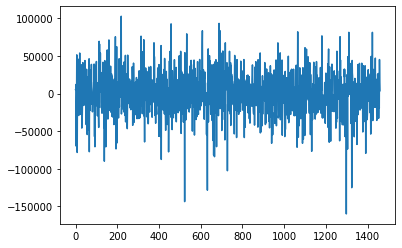

In [36]:
plt.plot(errors)
plt.show()

Assumption Six: features shouldn't be correlated with errors

In [40]:
def error_visual(df, name):
    
    plt.scatter(df, errors)
    plt.xlabel(name)
    plt.ylabel('Target')
    plt.show()

In [ ]:
for column in X.columns:
    error_visual(X[c])